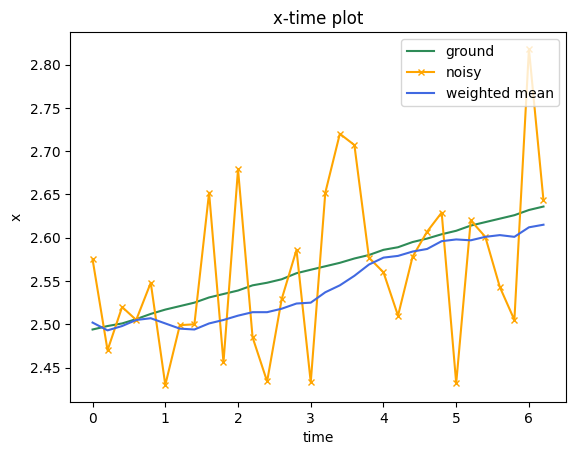

In [101]:
import numpy as np
import matplotlib.pyplot as plt

gxt_data = np.loadtxt('plots/ground_xt.txt')
nxt_data = np.loadtxt('plots/noisy_xt.txt')
mxt_data = np.loadtxt('plots/mean_xt.txt')
gxt_data = gxt_data[1:]
nxt_data = nxt_data[1:]
start_gt = gxt_data[0, 0]
start_nt = nxt_data[0, 0]
start_mt = mxt_data[0, 0]

gx = gxt_data[:, 1]
gt = gxt_data[:, 0] - start_gt
nx = nxt_data[:, 1]
nt = nxt_data[:, 0] - start_nt
mx = mxt_data[:, 1]
mt = mxt_data[:, 0] - start_mt

plt.plot(gt, gx, 'seagreen', label='ground')
plt.plot(nt, nx, 'orange', label='noisy', marker='x', markersize=5)
plt.plot(mt, mx, 'royalblue', label='weighted mean')
plt.xlabel('time')
plt.ylabel('x')
plt.legend(loc='upper right') 
plt.title('x-time plot')
plt.show()

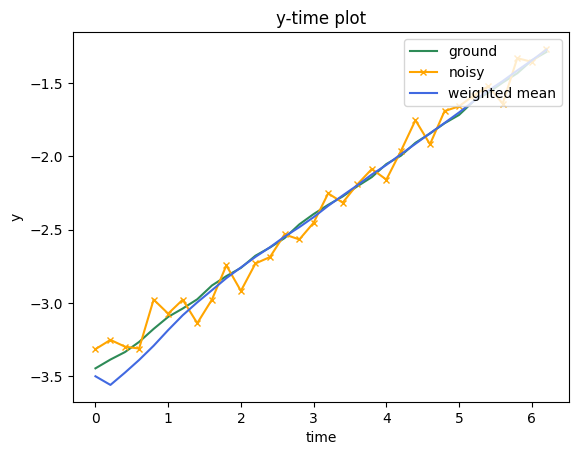

In [102]:
gyt_data = np.loadtxt('plots/ground_yt.txt')
nyt_data = np.loadtxt('plots/noisy_yt.txt')
myt_data = np.loadtxt('plots/mean_yt.txt')
gyt_data = gyt_data[1:]
nyt_data = nyt_data[1:]
start_gt = gyt_data[0, 0]
start_nt = nyt_data[0, 0]
start_mt = myt_data[0, 0]

gy = gyt_data[:, 1]
gt = gyt_data[:, 0] - start_gt
ny = nyt_data[:, 1]
nt = nyt_data[:, 0] - start_nt
my = myt_data[:, 1]
mt = myt_data[:, 0] - start_mt

plt.plot(gt, gy, 'seagreen', label='ground')
plt.plot(nt, ny, 'orange', label='noisy', marker='x', markersize=5)
plt.plot(mt, my, 'royalblue', label='weighted mean')
plt.xlabel('time')
plt.ylabel('y')
plt.legend(loc='upper right') 
plt.title('y-time plot')
plt.show()

max noisy: 0.21035446275275435
max filter: 0.17307223925286233
mean noisy: 0.11360330179572753
mean filter: 0.04357059385274869
% reduction: 61.646718744941154


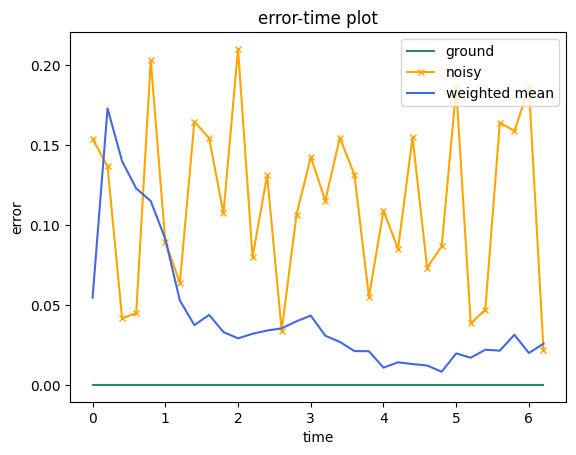

In [103]:
nx_error = (nxt_data[:, 1] - gxt_data[:, 1]) ** 2
ny_error = (nyt_data[:, 1] - gyt_data[:, 1]) ** 2
mx_error = (mxt_data[:, 1] - gxt_data[:, 1]) ** 2
my_error = (myt_data[:, 1] - gyt_data[:, 1]) ** 2

zeros = [0] * len(nt)
n_error = np.sqrt(np.array(nx_error + ny_error))
m_error = np.sqrt(np.array(mx_error + my_error))

print("max noisy:", max(n_error))
print("max filter:", max(m_error))
print("mean noisy:", np.mean(n_error))
print("mean filter:", np.mean(m_error))
reduction = (np.mean(n_error) - np.mean(m_error)) / np.mean(n_error)
print("% reduction:", reduction*100)

plt.plot(gt, zeros, 'seagreen', label='ground')
plt.plot(nt, n_error, 'orange', label='noisy', marker='x', markersize=5)
plt.plot(mt, m_error, 'royalblue', label='weighted mean')
plt.xlabel('time')
plt.ylabel('error')
plt.legend(loc='upper right') 
plt.title('error-time plot')
plt.show()